In [1]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

In [4]:
%autoreload 2
from guitarsounds import Sound, Signal
import guitarsounds as guit

In [5]:
import librosa
import librosa.display
from soundfile import write
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy import signal as sig
from noisereduce import reduce_noise

In [7]:
# Créer des instance de Son à partir des fichiers
file1 = "soundfiles/test_leste/1-1.wav"
file2 = "soundfiles/flax_carbon/Carbon_D0_2.wav"
test1 = Sound(file1)
test2 = Sound(file2)

test1.condition()
test2.condition()

Signal is too short to be trimmed before onset.

Not sufficient noise in the raw signal, unable to filter.



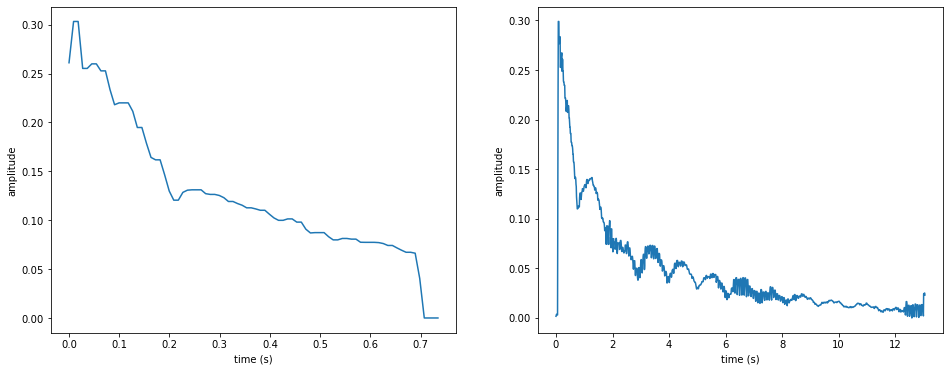

In [12]:
guit.compare(test1.signal, test2.signal, 'envelop')

In [14]:
signal = test2.signal.signal
time = test2.signal.time()
sr = test2.signal.sr
print(len(time))
print(len(signal))

287905
287905


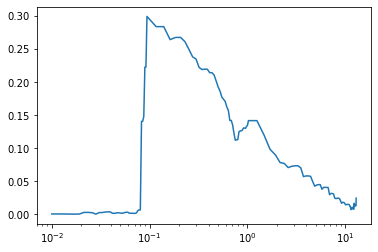

In [17]:
signal = test2.signal.signal
time = test2.signal.time()
sr = test2.signal.sr

max_window = 2048

current_exponent = -2
current_time = 10 ** current_exponent
index = int(current_time * sr)
window = 100 # number of samples per window
overlap = window//2
logenvelop=[]
logenvelop_time=[0]

while index+window <= len(signal):

    while logenvelop_time[-1] < 11**(current_exponent+1):
        if (index + window) < len(signal):
            logenvelop.append(np.max(signal[index:index+window]))
            logenvelop_time.append(time[index])
            index += overlap
        else:
            break

    if window*2 < max_window:
        window = window*10
    else:
        window = max_window
    
    overlap = window//2 
    current_exponent +=1

# remove the values where time=0 so the log scale does not break
del logenvelop_time[0]

plt.figure()
plt.plot(logenvelop_time, logenvelop)
plt.xscale('log')
plt.show()

In [18]:
def logenvelop(s, t):
    """
    Method to compute a variying frame envelop to make a smooth plot on a log x scale
    """
    # Parameters
    max_window = 2048 # maximum window width in samples
    min_window = 100  # starting width of the window
    min_time_exponent = -2 # starting time value  corresponds to 10e(min_time_exponent)
    
    # initial values
    current_exponent = min_time_exponent
    current_time = 10 ** current_exponent # start time on log scale
    index = int(current_time * sr) # Start at the specified time
    window = min_window # number of samples per window
    overlap = window//2
    logenvelop=[]
    logenvelop_time=[0] # First value for comparison

    while index+window <= len(signal):

        while logenvelop_time[-1] < 11**(current_exponent+1):
            if (index + window) < len(signal):
                logenvelop.append(np.max(signal[index:index+window]))
                logenvelop_time.append(time[index])
                index += overlap
            else:
                break

        if window*2 < max_window:
            window = window*10
        else:
            window = max_window

        overlap = window//2 
        current_exponent +=1

    # remove the value where time=0 so the log scale does not break
    logenvelop_time.remove(0)
    return logenvelop, logenvelop_time


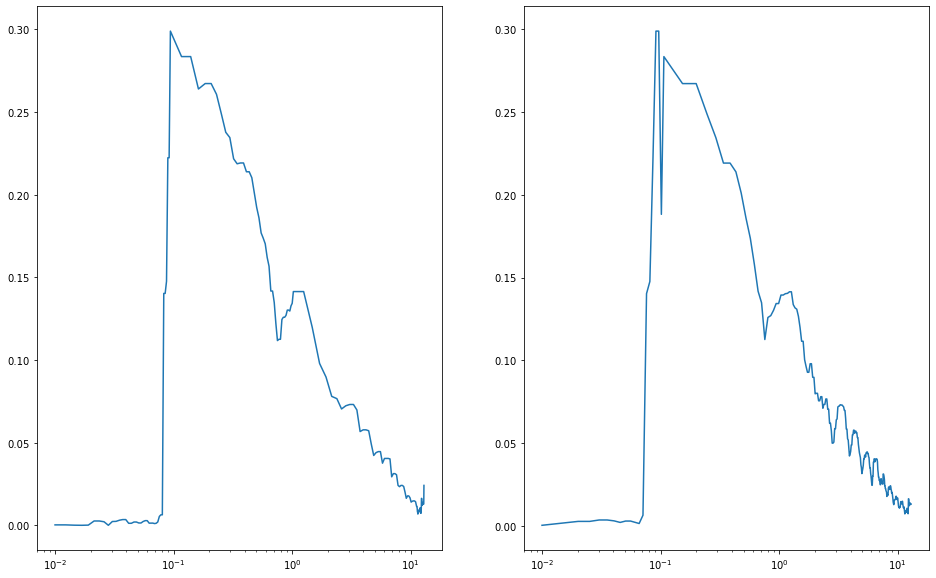

In [21]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
e, t = logenvelop(signal, time)
plt.plot(t,e)
plt.xscale('log')

plt.subplot(1,2,2)
log_env, log_time = test2.signal.log_envelop()
plt.plot(log_time, log_env)
plt.xscale('log')